In [4]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,AutoMinorLocator)
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import numpy as np
from connector import getConnection

### Mean  index rate (monthly basis)

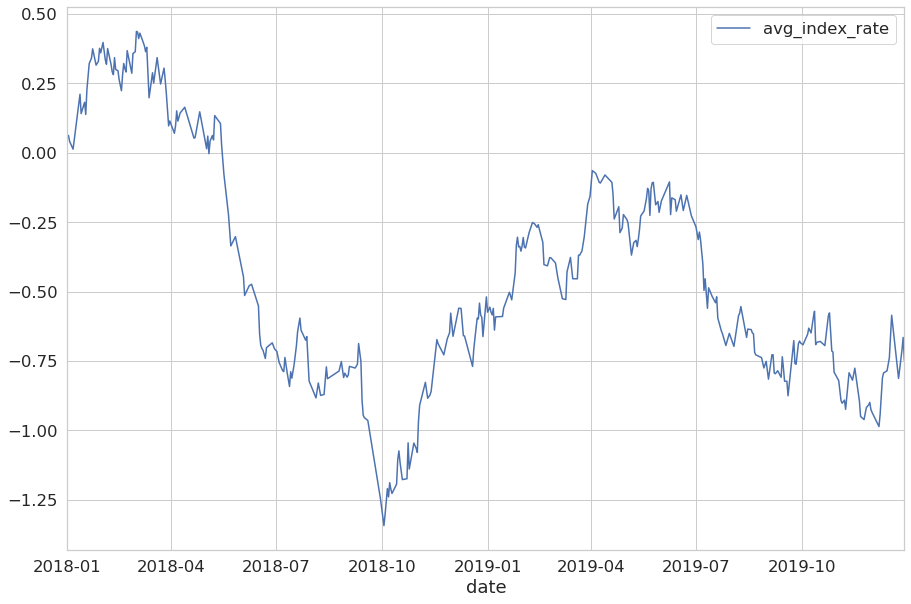

In [83]:
conn = getConnection()

sql = """
SELECT d.date ,AVG(s.index_rate) as avg_index_rate  FROM sale s, date d
WHERE s.sale_date_key = d.date_key 
GROUP BY d.date
HAVING AVG(s.index_rate) IS NOT NULL
ORDER BY d.date
"""

df = sqlio.read_sql_query(sql, conn)


conn.close()
df.head()
df.plot(kind='line',x='date',y='avg_index_rate',figsize=(15,10))



### distribution of loans on maritial status

marital_status,divorced,married,single
loan_amount,4548500.0,22495500.0,10891000.0


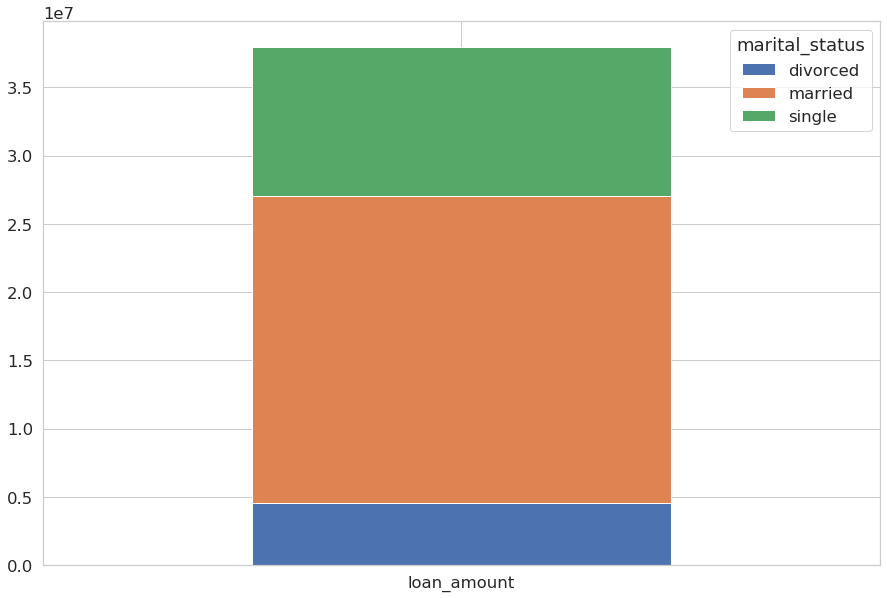

In [84]:
conn = getConnection()

sql = """
SELECT c.marital_status , SUM(s.loan_amount) as loan_amount  FROM sale s, customer c
WHERE s.customer_key = c.customer_key
GROUP BY c.marital_status
"""

df = sqlio.read_sql_query(sql, conn)

df = df.set_index('marital_status')
df = df.transpose()
#df = df.groupby(['marital_status'])

df.plot.bar(stacked=True,figsize=(15,10), rot = 0)
#pivot_df.loc[:,['Jan','Feb', 'Mar']].plot.bar(stacked=True, color=colors, figsize=(10,7))
conn.close()
df.head()



### Distribution of loans by age

### Distribution by job